In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_sample_image, make_blobs, load_files
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, accuracy_score
import matplotlib.cm as cm
from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [41]:
df = pd.read_csv('C:\\Users\\junge\\Desktop\\Python\\Lab_2\\Telecust1.csv')

# get rid of char table
df = df.drop('custcat', axis = 1)

feature_columns = ['tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside']
df.head()


region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4

## PCA decomposition

In [43]:
X = df[feature_columns]
reduced_pca = PCA(n_components=2).fit_transform(X)

In [44]:
fig = px.scatter(reduced_pca,
                 x=0, y=1,
                 labels={
                     "0": "Principal component 0",
                     "1": "Principal component 1"
                        },
                 title = 'PCA plot',
                 color=df['region']).update(layout = dict(title = dict(x = 0.5)))
fig.show()

## TSNE

In [45]:
reduced_tsne = TSNE(n_components=2).fit_transform(X)

In [46]:
fig = px.scatter(reduced_tsne,
                 x=0, y=1,
                 labels={
                     "0": "Principal component 0",
                     "1": "Principal component 1"
                        },
                 title = 'PCA plot',
                 color=df['region']).update(layout = dict(title = dict(x = 0.5)))
fig.show()

## Color Quantization using K-Means

In [47]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

shape: (1536, 2048, 3)


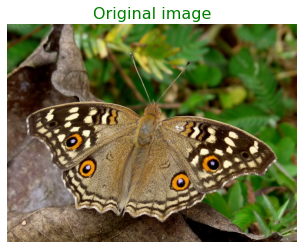

In [55]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

butterfly = mpimg.imread('butterfly.jpg') 
  
print('shape:', butterfly.shape)
plt.axis('off')
plt.title(f'Original image', color='g',fontsize=16)
plt.imshow(butterfly)
plt.show() 

In [56]:
n_colors = [64, 32, 16, 8]

In [57]:
butterfly = np.array(butterfly, dtype=np.float64) / 255

In [58]:
w, h, d = tuple(butterfly.shape)
image_array = np.reshape(butterfly, (w * h, d))

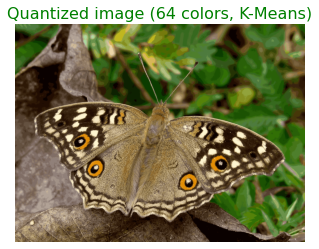

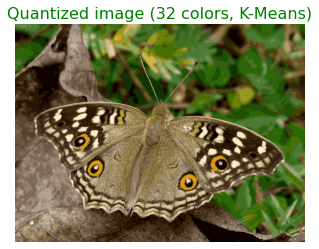

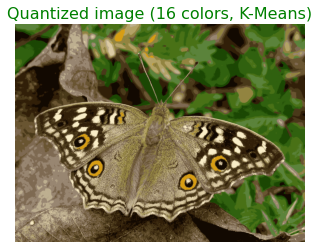

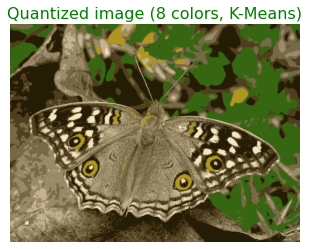

In [59]:
for it,n_color in enumerate(n_colors):
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_color, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.figure(it)
    plt.axis('off')
    plt.title(f'Quantized image ({n_color} colors, K-Means)', color='g',fontsize=16)
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

## Part 2.3

In [60]:
centers = np.random.randint(3,5)
print(centers)
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=centers,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

4


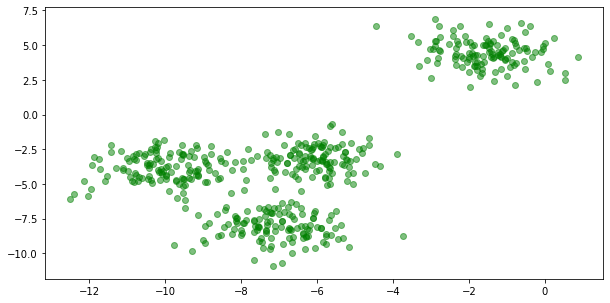

In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'green')
plt.show()

In [62]:
range_n_clusters = np.array([centers - 1, centers, centers + 1])

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


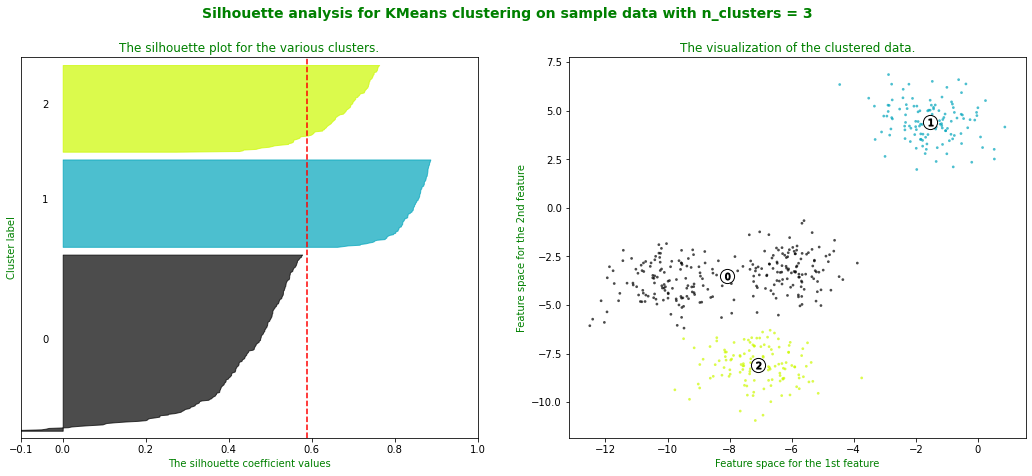

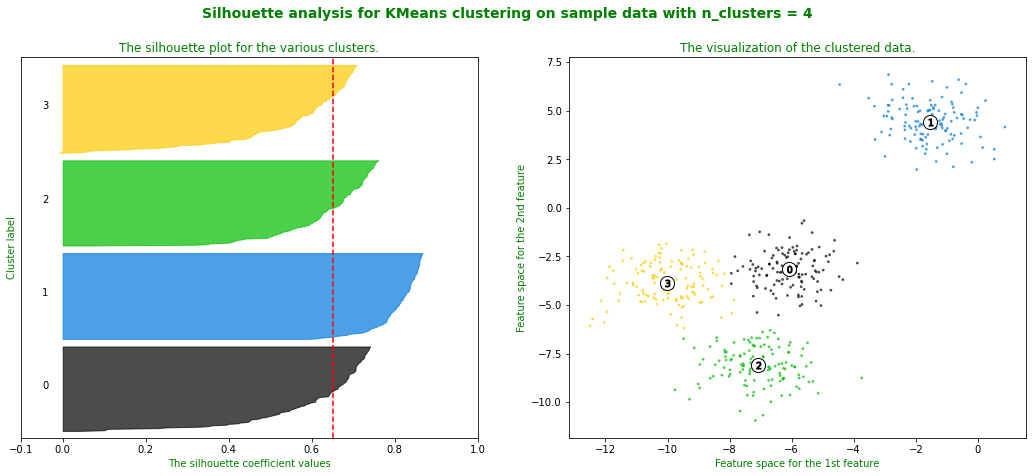

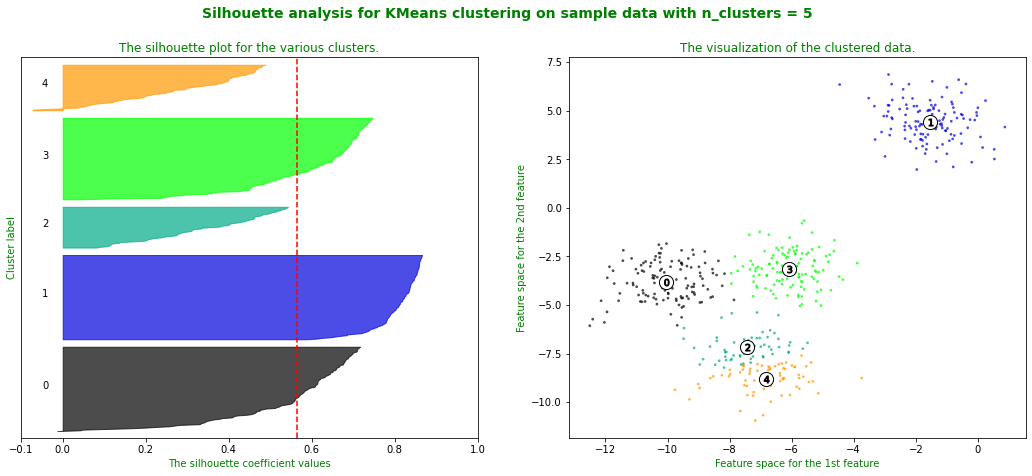

In [63]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # (b - a)/max(a, b)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("The silhouette plot for the various clusters.", color='g')
    ax1.set_xlabel("The silhouette coefficient values", color='g')
    ax1.set_ylabel("Cluster label", color='g')
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.", color='g')
    ax2.set_xlabel("Feature space for the 1st feature", color='g')
    ax2.set_ylabel("Feature space for the 2nd feature", color='g')
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), color='g',
                 fontsize=14, fontweight='bold')

## EM 

In [64]:
mean1 = (1, 2)
cov1 = np.identity(2)
X1 = multivariate_normal(mean1, cov1, 200)
mean2 = (4, 5)
cov2 = 3*np.identity(2)
X2 = multivariate_normal(mean2, cov2, 200)
X = np.concatenate([X1, X2])

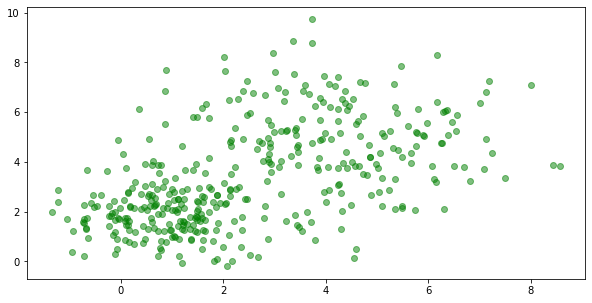

In [65]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'green')
plt.show()

In [66]:
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)

GaussianMixture(n_components=2)

In [67]:
print('means\n',clf.means_)
print('weights\n',clf.weights_)
print('covariances\n',clf.covariances_)

means
 [[0.88734367 1.90025672]
 [4.09216793 4.8532349 ]]
weights
 [0.49551894 0.50448106]
covariances
 [[[ 0.92605751 -0.05124235]
  [-0.05124235  0.85403175]]

 [[ 2.76083597 -0.21219281]
  [-0.21219281  2.98414723]]]


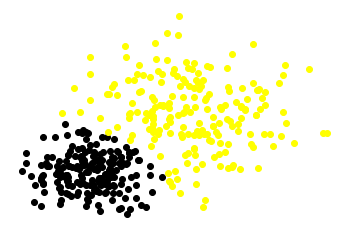

In [69]:
predicted = clf.predict(X)
color=['black','yellow']
for k in range(0,2):
    data = X[predicted==k]
    plt.scatter(data[:,0],data[:,1],c=color[k])
plt.axis('off')
plt.show()

## NLP

In [72]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [73]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [74]:
count_vect = CountVectorizer( token_pattern=r'(?u)\b[a-zA-Z]\w+\b',
                              ngram_range=(1, 2),
                              stop_words='english' )
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 1065618)

In [75]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 1065618)

In [77]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [78]:
clf.score(X_train_counts, twenty_train.target)

0.9621707618879265

In [88]:
wc=WordCloud(width = 1000, height=1000,stopwords=STOPWORDS, colormap='viridis', background_color='white', random_state=1)
text = ' '.join(count_vect.get_feature_names())

embed_code=wc.generate(text=text)

(-0.5, 999.5, 999.5, -0.5)

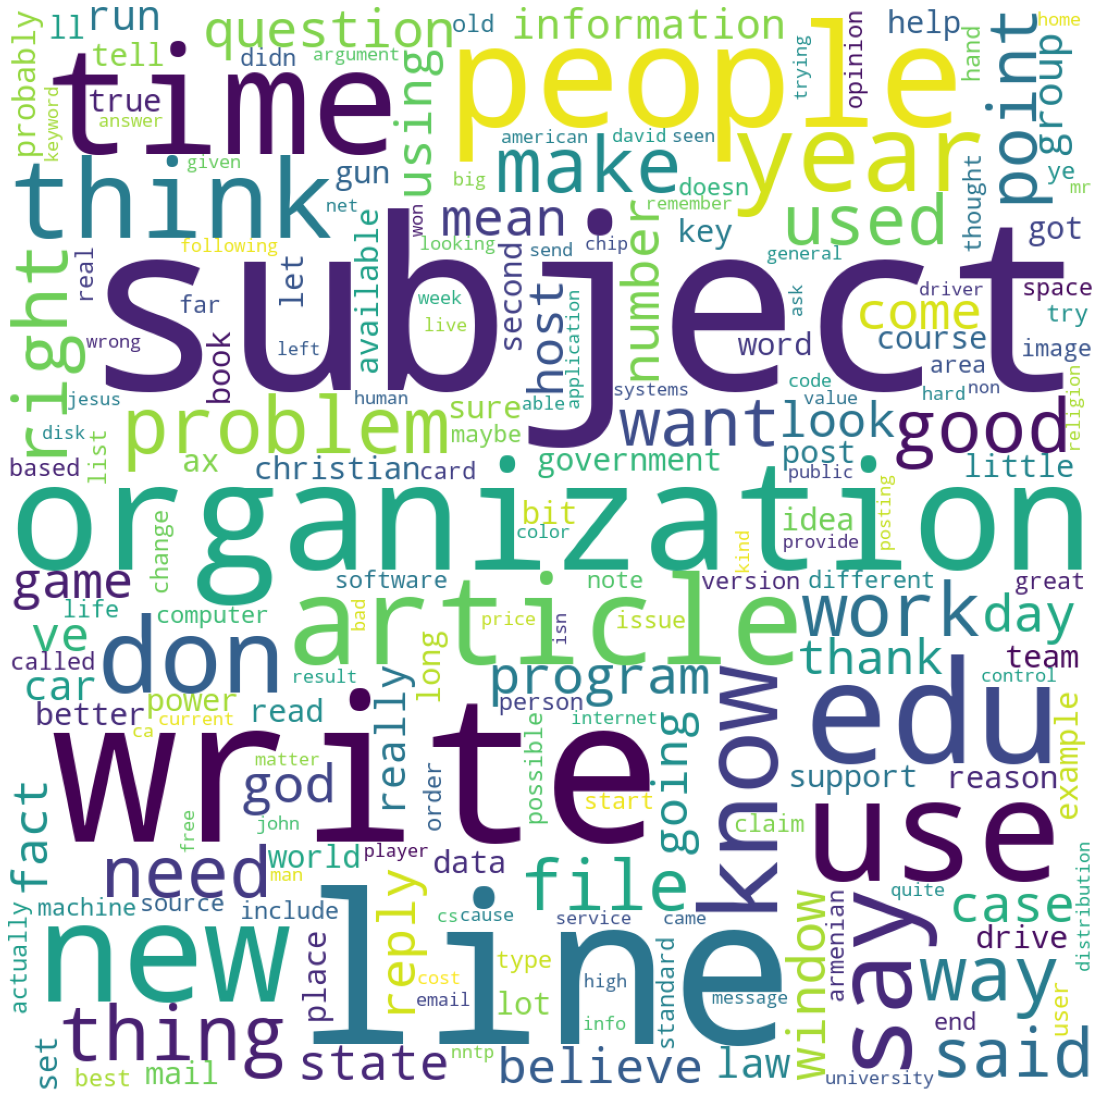

In [89]:
plt.figure(figsize=(20,20))
plt.imshow(embed_code)
plt.axis("off")